In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer  # Gestion des valeurs manquantes
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Chargement
df = pd.read_csv("Customer_Churn.csv")

In [5]:
# Affichage des premières lignes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Dimensions du dataset
df.shape  # (lignes, colonnes)

(7043, 21)

In [7]:
# Informations générales (types, valeurs manquantes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Distribution de la variable cible (Churn)
print("\n Distribution de la variable cible 'Churn' :")
print(df['Churn'].value_counts())
print("\n Proportions :")
print(df['Churn'].value_counts(normalize=True) * 100)


 Distribution de la variable cible 'Churn' :
Churn
No     5174
Yes    1869
Name: count, dtype: int64

 Proportions :
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Text(0, 0.5, 'Nombre de clients')

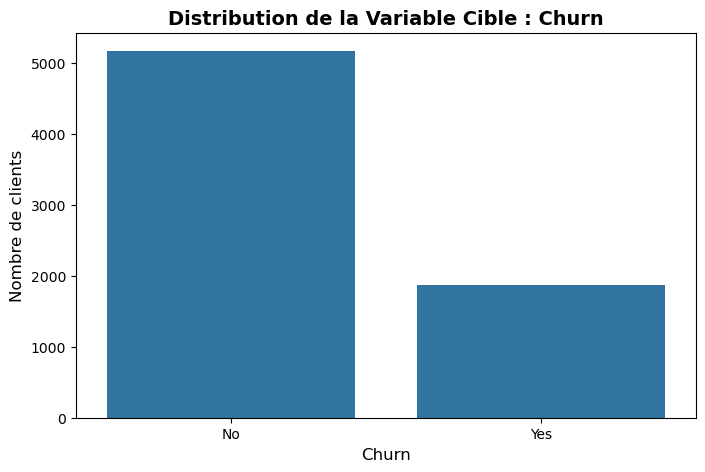

In [26]:
#distribution de la variable cible (Churn)
#sns.countplot(x="Churn", data=df)

# Visualisation de la distribution du Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribution de la Variable Cible : Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

Text(0.5, 1.0, 'Répartition des classes de diagnosis')

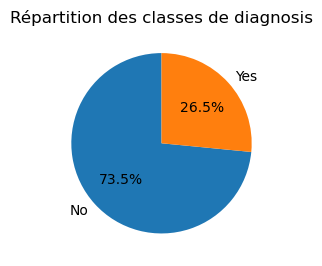

In [27]:
# pie chart
plt.subplot(1,2,2)
df.Churn.value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['No', 'Yes'],
    startangle=90
)
plt.ylabel('')
plt.title('Répartition des classes de diagnosis')


In [33]:
#  Identification des colonnes catégorielles
print("=== COLONNES NUMERIQUES ===")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f" Variables numériques ({len(numeric_features)}) : {numeric_features}")
print("=== COLONNES CATÉGORIELLES ===")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Retirer la variable cible et l'ID client des listes
if 'Churn' in categorical_columns:
    categorical_columns.remove('Churn')
if 'customerID' in categorical_columns:
    categorical_columns.remove('customerID')
    
print(F"Variables catégorielles :({len(categorical_columns)})")
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"  - {col} : {len(unique_vals)} valeurs uniques → {unique_vals[:5]}")

=== COLONNES NUMERIQUES ===
 Variables numériques (3) : ['SeniorCitizen', 'tenure', 'MonthlyCharges']
=== COLONNES CATÉGORIELLES ===
Variables catégorielles :(16)
  - gender : 2 valeurs uniques → ['Female' 'Male']
  - Partner : 2 valeurs uniques → ['Yes' 'No']
  - Dependents : 2 valeurs uniques → ['No' 'Yes']
  - PhoneService : 2 valeurs uniques → ['No' 'Yes']
  - MultipleLines : 3 valeurs uniques → ['No phone service' 'No' 'Yes']
  - InternetService : 3 valeurs uniques → ['DSL' 'Fiber optic' 'No']
  - OnlineSecurity : 3 valeurs uniques → ['No' 'Yes' 'No internet service']
  - OnlineBackup : 3 valeurs uniques → ['Yes' 'No' 'No internet service']
  - DeviceProtection : 3 valeurs uniques → ['No' 'Yes' 'No internet service']
  - TechSupport : 3 valeurs uniques → ['No' 'Yes' 'No internet service']
  - StreamingTV : 3 valeurs uniques → ['No' 'Yes' 'No internet service']
  - StreamingMovies : 3 valeurs uniques → ['No' 'Yes' 'No internet service']
  - Contract : 3 valeurs uniques → ['Month-to

In [34]:
#Suppression de la colonne customerID

df.drop(columns=["customerID"], axis=1, inplace=True)

In [35]:
# Vérifier les doublons et les supprimer si nécessaire
df.drop_duplicates(inplace=True)

In [36]:
# Conversion de TotalCharges en numérique (peut contenir des espaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [44]:
# Encodage temporaire de la variable cible
df.Churn = df.Churn.replace({'Yes': 1, 'No': 0})

In [45]:
# les statistiques descriptives (mean, std, min, max, quartiles)
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.0000,0.000,0.0000,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80
Churn,7021.0,0.264492,0.441094,0.00,0.0000,0.000,1.0000,1.00


In [46]:
# Identifier les features avec la plus grande variance
numeric_cols = ["SeniorCitizen","MonthlyCharges","tenure","TotalCharges"]
variances = df[numeric_cols].var().sort_values(ascending=False)

top_variance_features = variances.head(5)

top_variance_features

TotalCharges      5.138477e+06
MonthlyCharges    9.041448e+02
tenure            6.019645e+02
SeniorCitizen     1.361215e-01
dtype: float64

In [47]:
# Calculer le skewness (asymétrie) de chaque feature numérique
skewness = df[numeric_cols].apply(skew).sort_values(ascending=False)

skewness

SeniorCitizen     1.829596
tenure            0.235491
MonthlyCharges   -0.224049
TotalCharges           NaN
dtype: float64

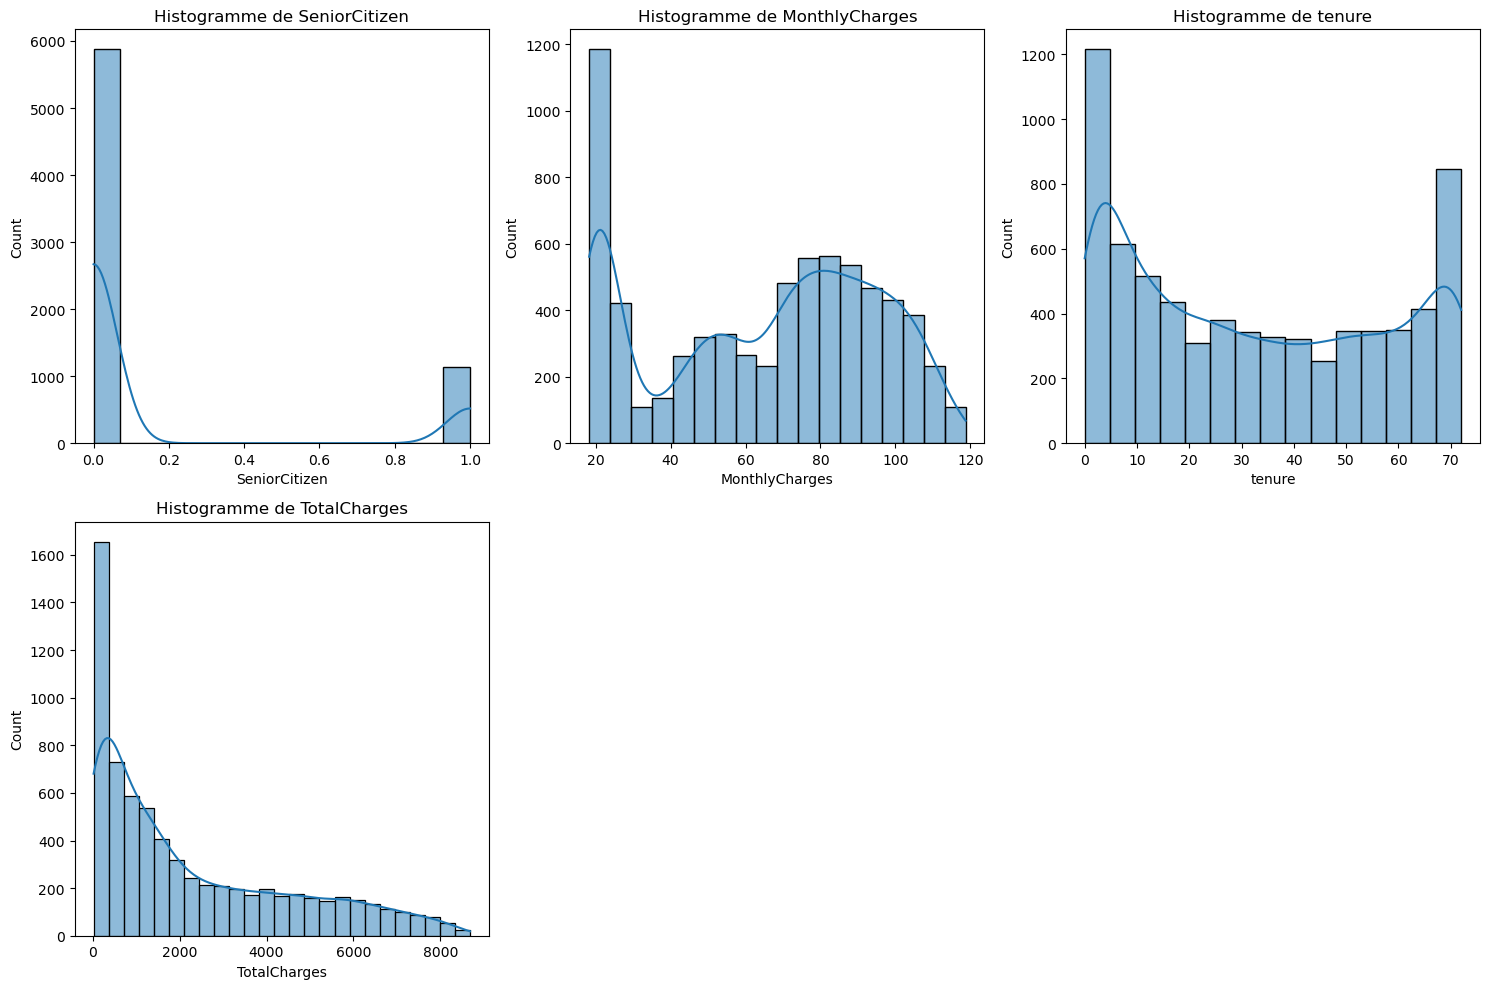

In [48]:
#Histogrammes des features  avec KDE
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols):
    plt.subplot(2, 3,i+1)
    sns.histplot(df[feature], kde = True)
    plt.title(f'Histogramme de {feature}')
    
plt.tight_layout()
plt.show()

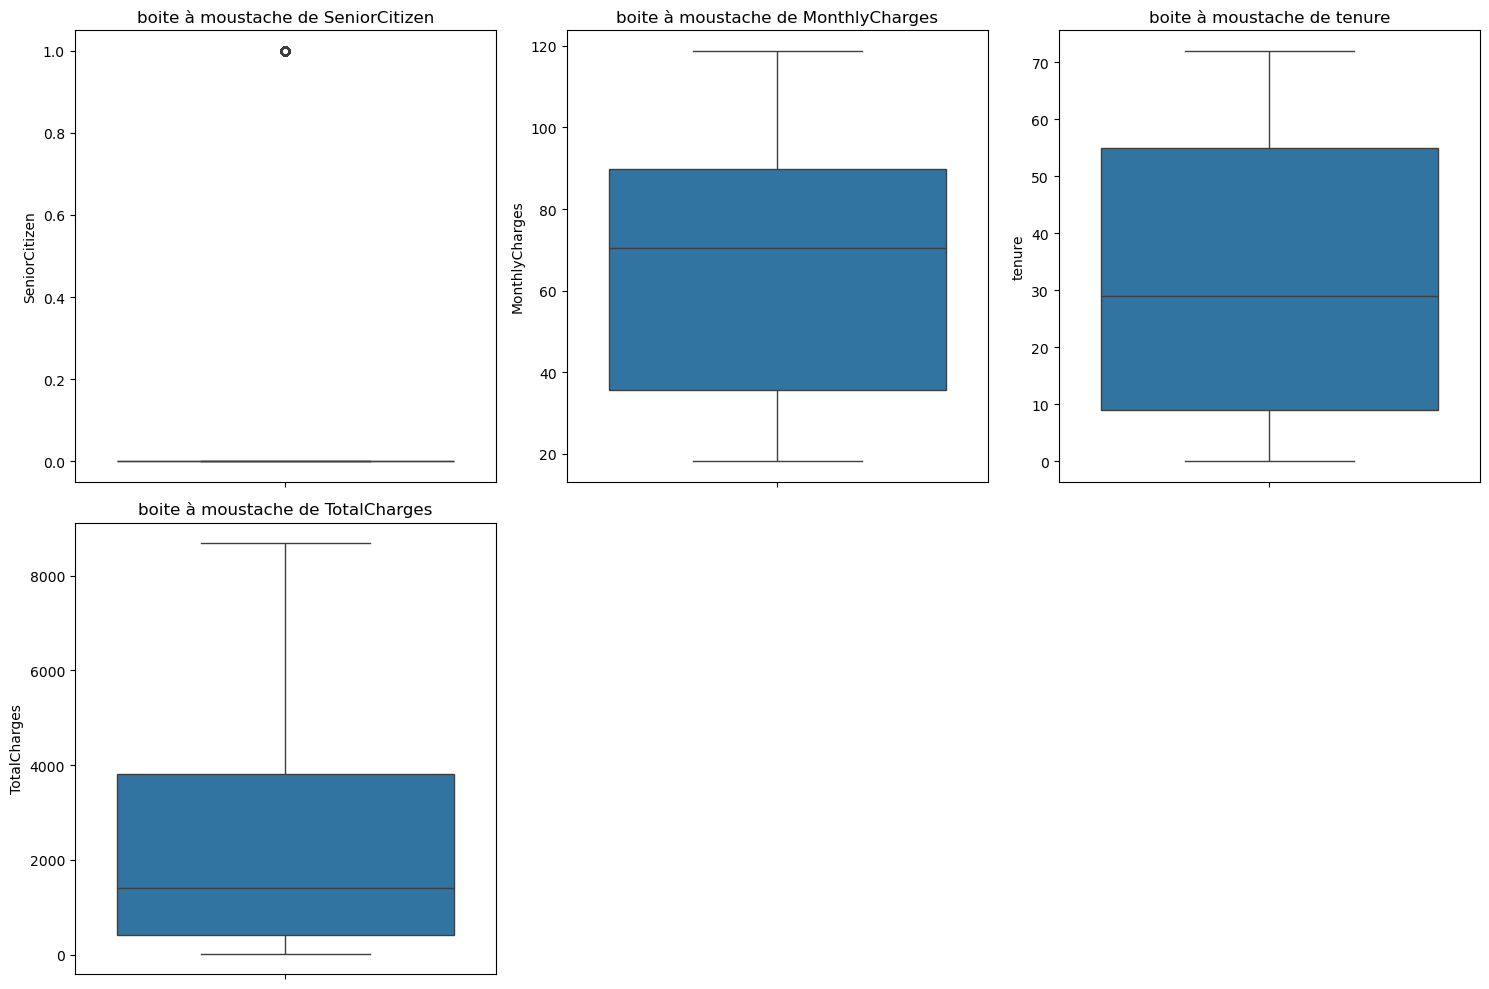

In [49]:
# Boxplots pour détecter les outliers

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols):
    plt.subplot(2, 3,i+1)
    sns.boxplot(df[feature])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()

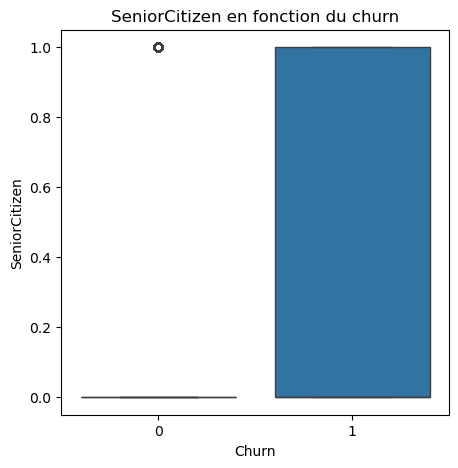

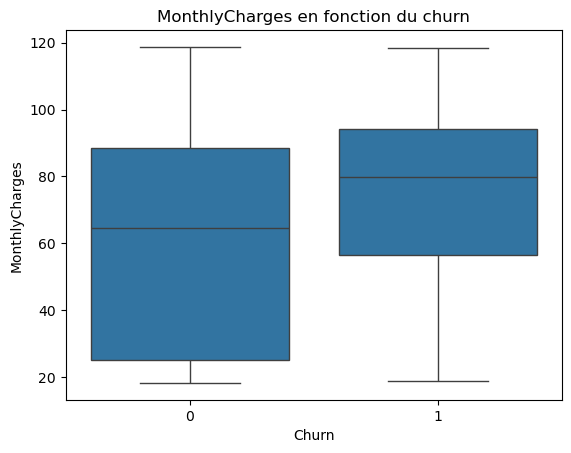

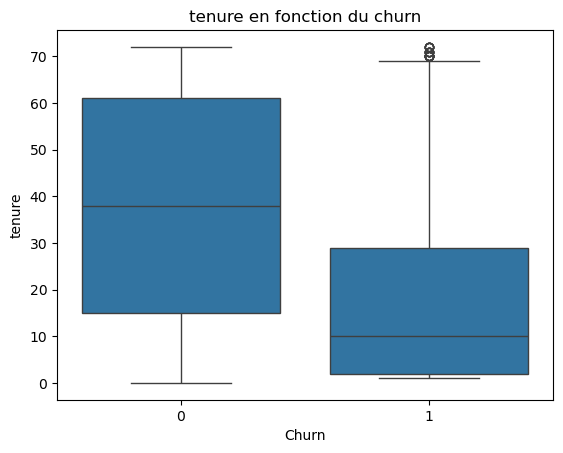

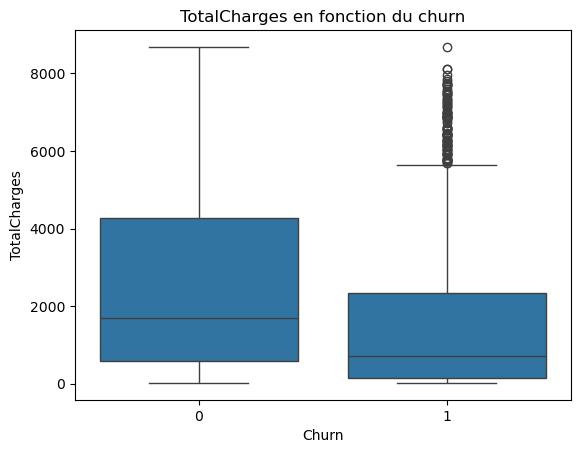

In [50]:
#Relation entre churn et variables numériques
plt.figure(figsize=(5, 5))
for col in numeric_cols:
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} en fonction du churn")
    plt.show()

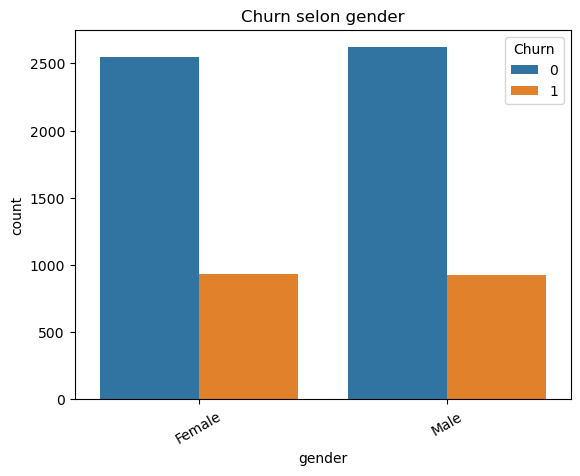

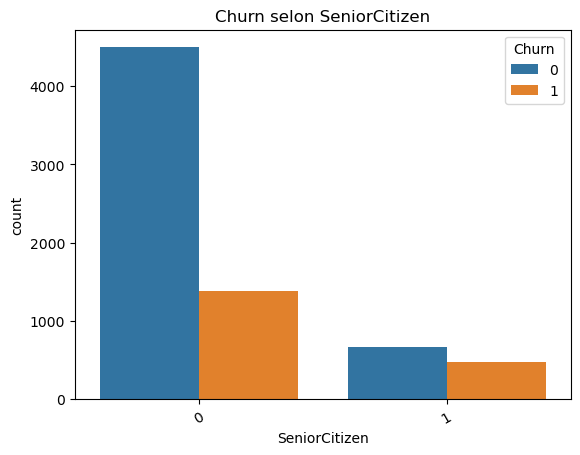

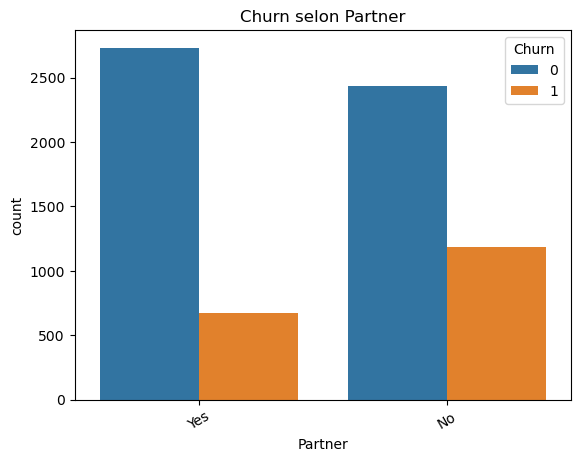

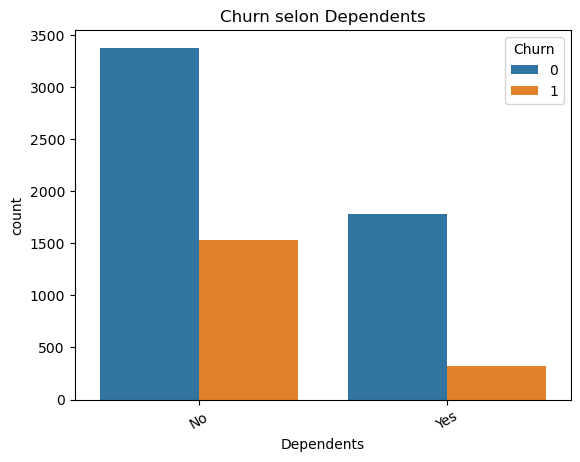

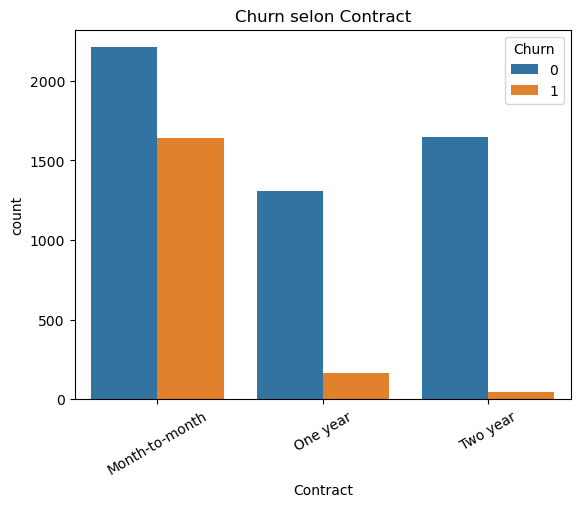

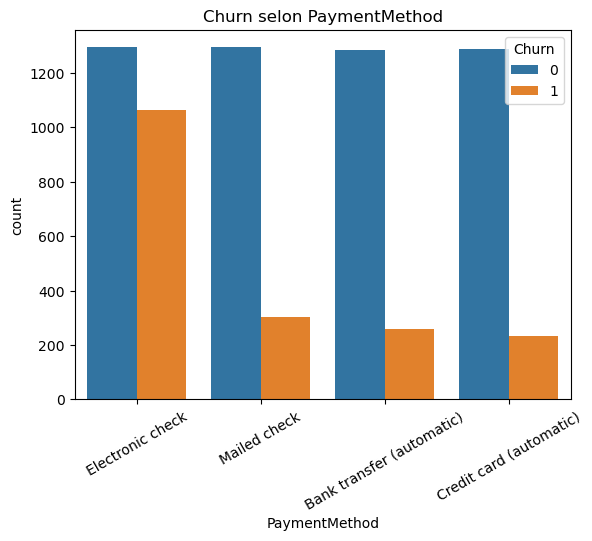

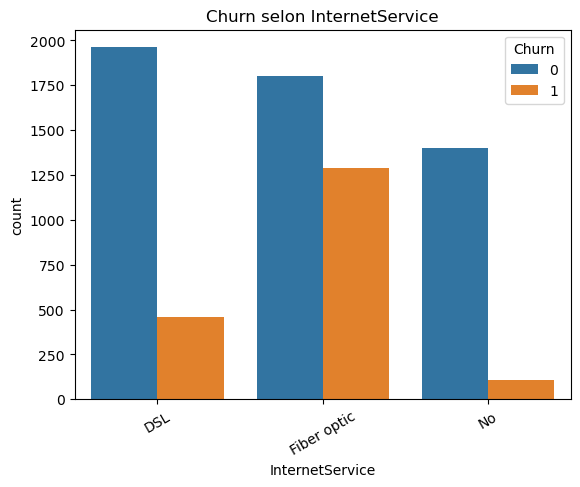

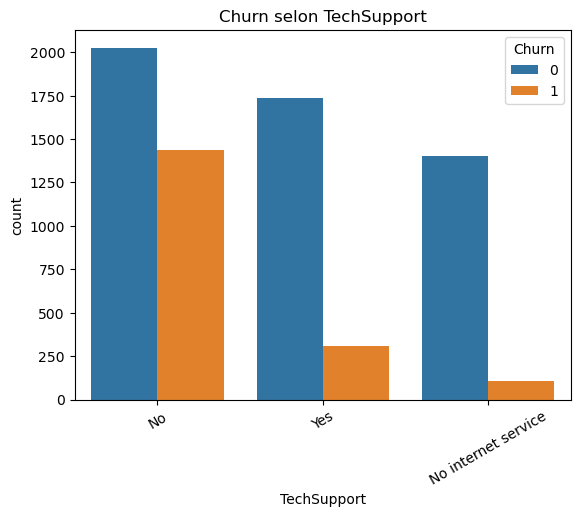

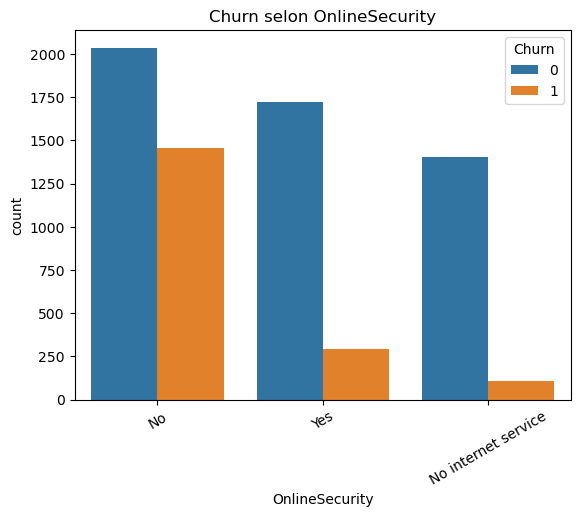

In [51]:
#Proportions pour chaque catégorie (ex : gender, Partner, Dependents, Contract).
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "Contract", "PaymentMethod", "InternetService",
    "TechSupport", "OnlineSecurity"
]

for col in categorical_cols:
    sns.countplot(data=df, x=col, hue="Churn")
    plt.xticks(rotation=30)
    plt.title(f"Churn selon {col}")
    plt.show()

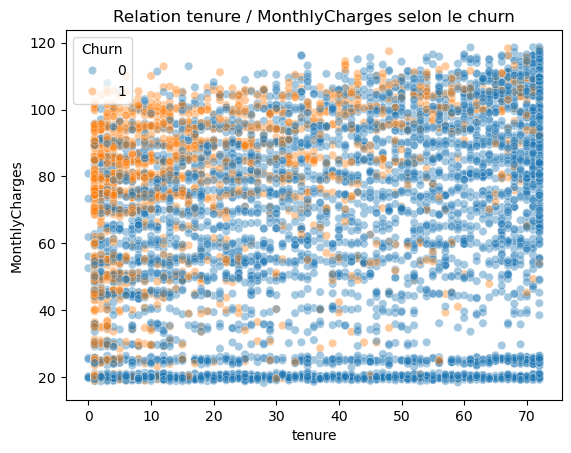

In [53]:
# Scatter plot : tenure vs MonthlyCharges
sns.scatterplot(
    data=df,
    x="tenure",
    y="MonthlyCharges",
    hue="Churn",
    alpha=0.4
)
plt.title("Relation tenure / MonthlyCharges selon le churn")
plt.show()


Text(0.5, 1.0, 'Matrice de Corrélation des Variables Numériques')

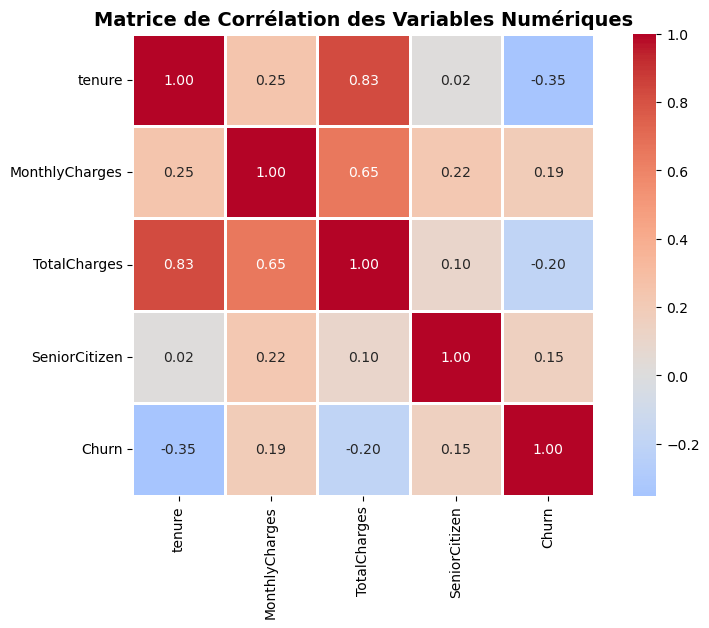

In [55]:
# Calcul de la corrélation (Heatmap)
numeric_cols_with_target = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']
correlation_matrix = df[numeric_cols_with_target].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')

In [58]:
# Top  des features les plus corrélées avec le diagnostic
corr_target = correlation_matrix['Churn'].drop('Churn').abs().sort_values(ascending=False)

top_corr_features = corr_target.head()
top_corr_features

tenure            0.351508
TotalCharges      0.198362
MonthlyCharges    0.194508
SeniorCitizen     0.151619
Name: Churn, dtype: float64

In [61]:
# c) Scatterplots des 3 paires de features les plus corrélées
feature_cor = correlation_matrix.drop('Churn', axis=1).drop('Churn', axis=0)

cor_pairs = (
    feature_cor.abs()
    .unstack()
    .sort_values(ascending=False)
)

#suppression des doublons
cor_pairs = cor_pairs[cor_pairs < 1]
top_pairs = cor_pairs.head()

top_pairs

tenure          TotalCharges      0.825293
TotalCharges    tenure            0.825293
MonthlyCharges  TotalCharges      0.650540
TotalCharges    MonthlyCharges    0.650540
tenure          MonthlyCharges    0.245251
dtype: float64

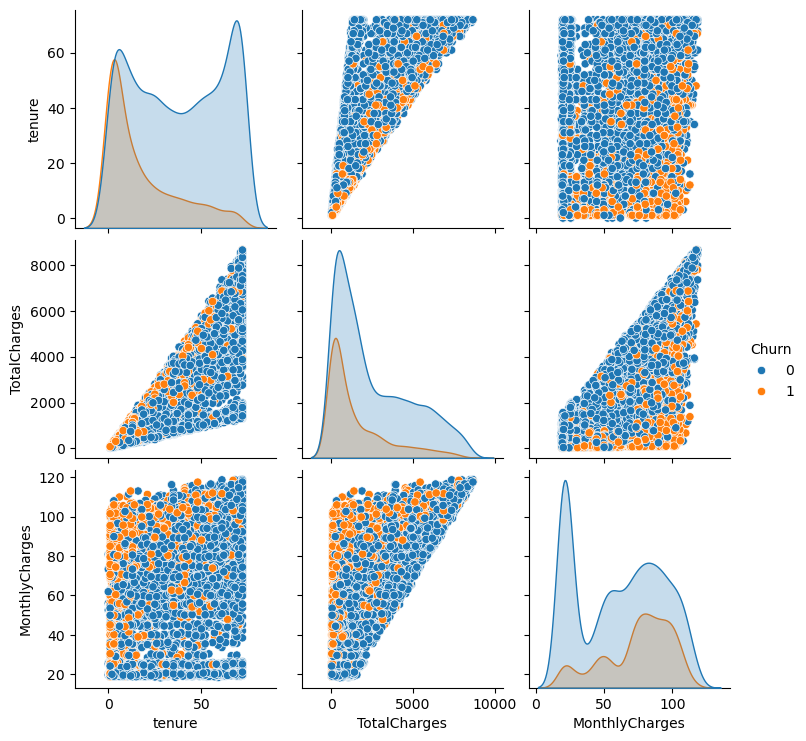

In [62]:
top_pairs_feat = ['tenure', 'TotalCharges', 'MonthlyCharges','Churn']
sns.pairplot(df[top_pairs_feat], hue='Churn')

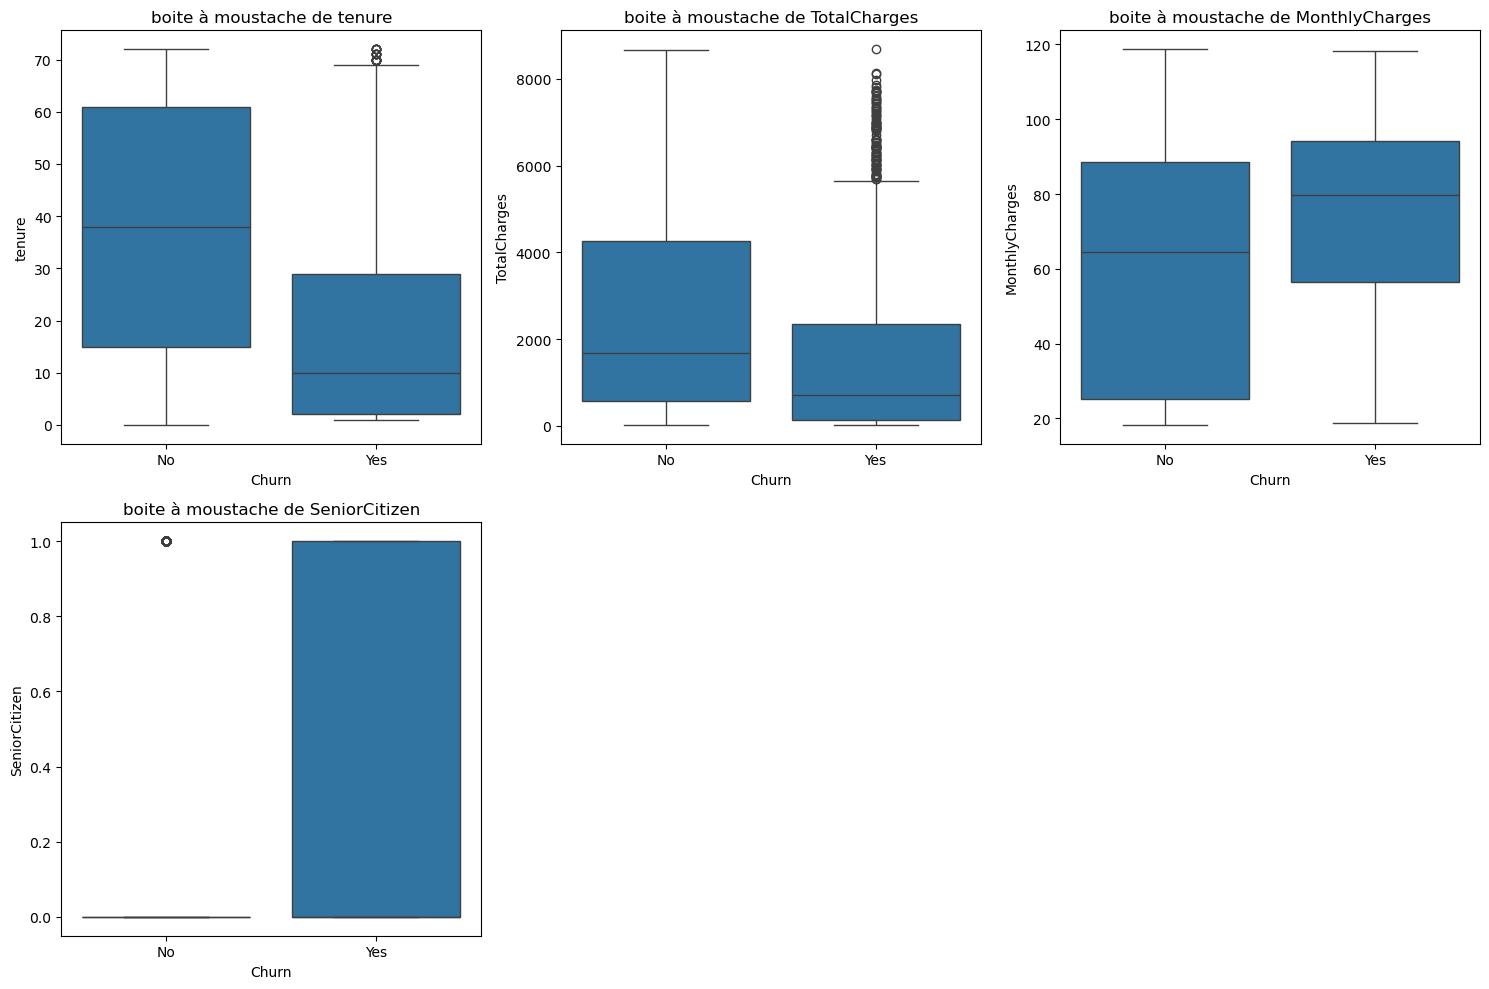

In [63]:

# 7. Analyse par classe (yes vs No)
# a) Boxplots comparatifs pour les 5 features les plus discriminantes
top_5_features = top_corr_features.index[:5]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3,i+1)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.xticks([0,1], ['No', 'Yes'])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()

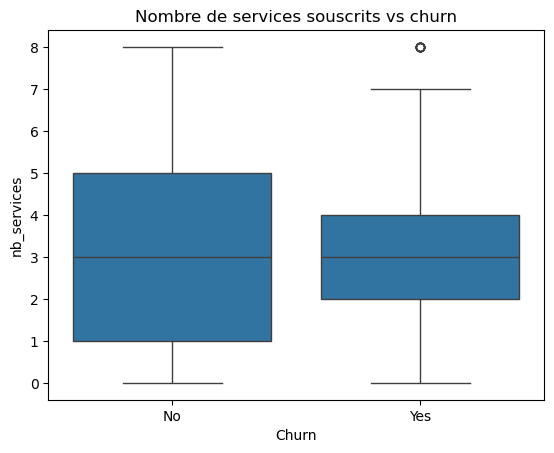

In [35]:
#  FEATURE EXPLORATOIRE – NOMBRE DE SERVICES
services = [
    "PhoneService", "MultipleLines", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies"
]

# Création d'une nouvelle feature
df["nb_services"] = df[services].apply(
    lambda row: sum(row == "Yes"), axis=1
)

# Visualisation
sns.boxplot(data=df, x="Churn", y="nb_services")
plt.title("Nombre de services souscrits vs churn")
plt.show()

In [64]:

# b) T-tests pour vérifier les différences significatives entre classes

from scipy.stats import ttest_ind

ttest_results = []

for feature in top_5_features:
    No_values = df[df['Churn'] == 0][feature]
    Yes_values = df[df['Churn'] == 1][feature]
    t_stat, p_value = ttest_ind(No_values, Yes_values)
    ttest_results.append({
        'feature': feature,
        't_statistic': t_stat,
        'p_value': p_value
    })
    
    ttest_df = pd.DataFrame(ttest_results)
ttest_df

,feature,t_statistic,p_value
0,tenure,31.456559,2.628095e-203
1,TotalCharges,NaN,NaN
2,MonthlyCharges,-16.613049,8.041922e-61
3,SeniorCitizen,-12.851092,2.232819e-37


In [65]:
# c) Moyennes et écarts-types par classe
class_stats = df.groupby('Churn')[top_5_features].agg(['mean', 'std'])
class_stats

tenure            TotalCharges              MonthlyCharges  \
            mean        std         mean          std           mean   
Churn                                                                  
0      37.640782  24.083296  2560.264118  2329.034632      61.344878   
1      18.088853  19.546231  1541.376548  1893.151020      74.604308   

                 SeniorCitizen            
             std          mean       std  
Churn                                     
0      31.069815      0.128970  0.335199  
1      24.597504      0.255789  0.436421

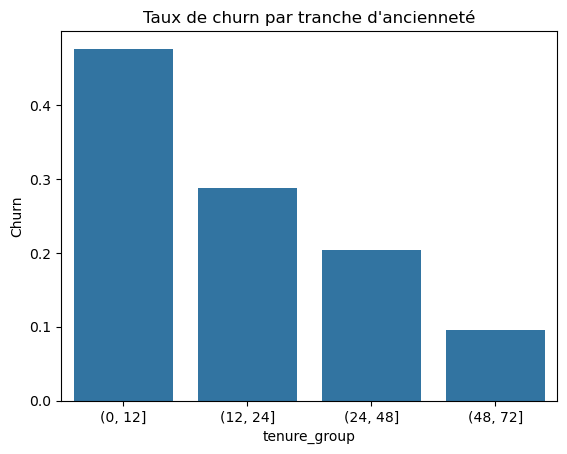

In [36]:
#  ANALYSE PAR TRANCHES D’ANCIENNETÉ

# Création de groupes d'ancienneté
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72]
)

# Calcul du taux de churn par groupe
tenure_churn = (
    df.groupby("tenure_group")["Churn"]
      .apply(lambda x: (x == "Yes").mean())
      .reset_index()
)

# Visualisation
sns.barplot(data=tenure_churn, x="tenure_group", y="Churn")
plt.title("Taux de churn par tranche d'ancienneté")
plt.show()


 Analyse de l'impact des variables catégorielles sur le Churn :


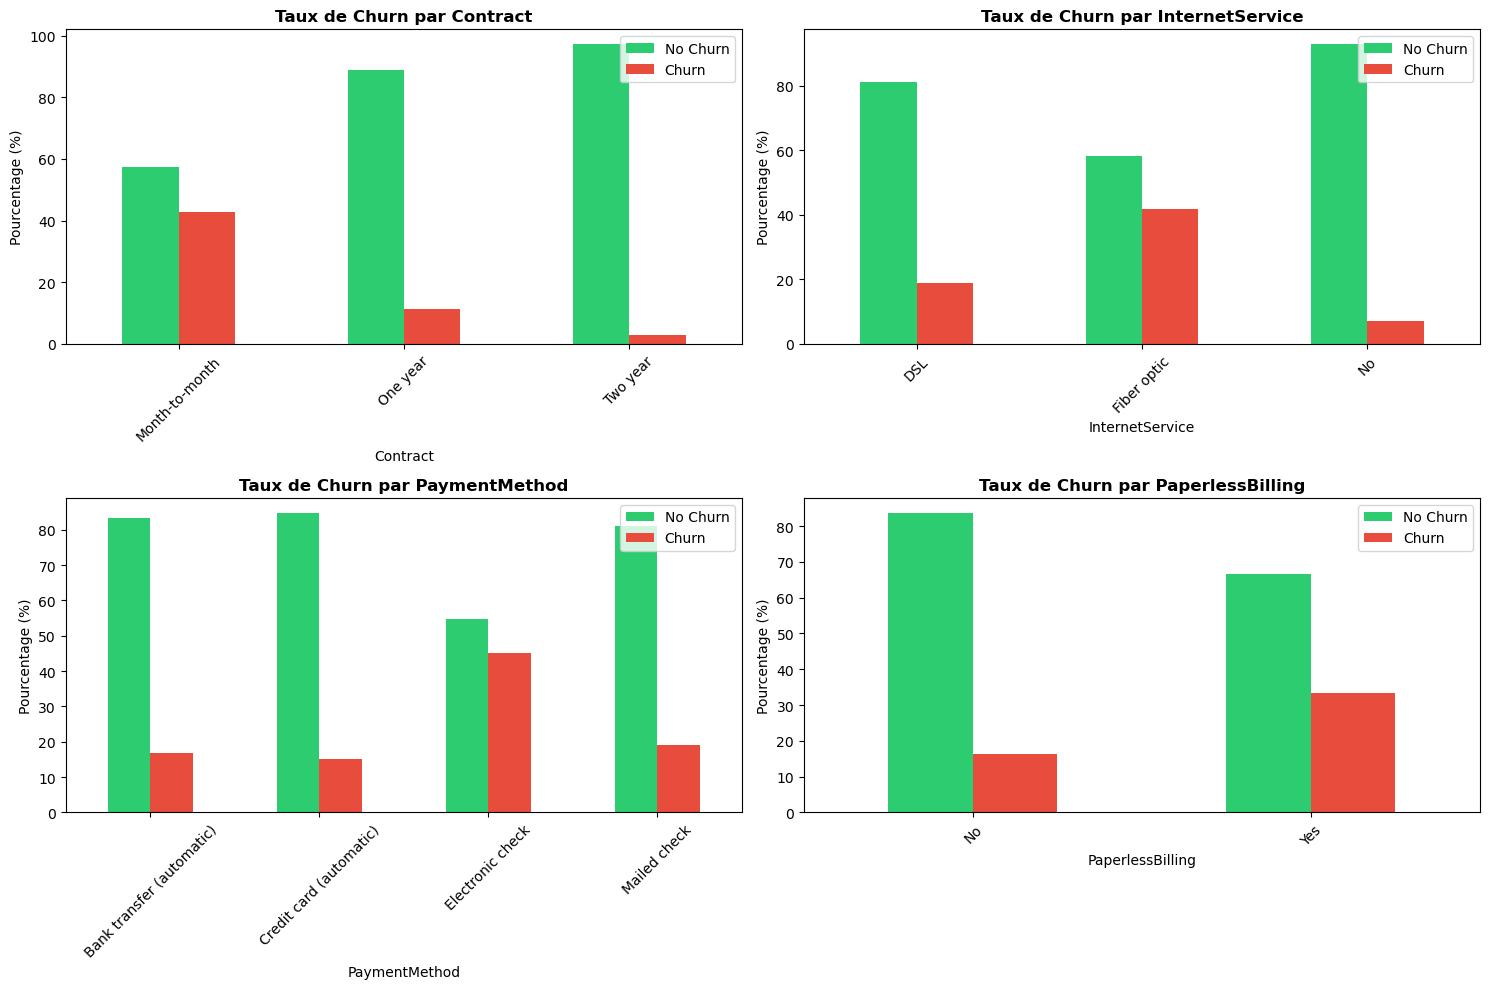

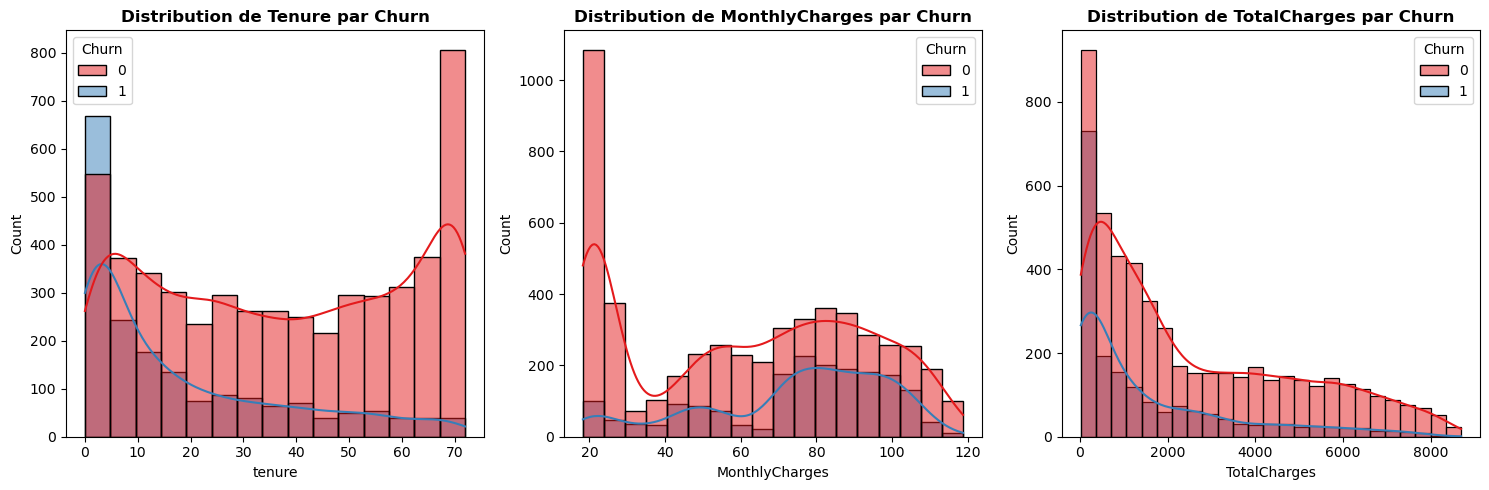

In [66]:
# Analyse de la relation entre les variables catégorielles et le Churn
print("\n Analyse de l'impact des variables catégorielles sur le Churn :")

# Sélection de quelques variables clés pour l'analyse
key_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    # Création d'un tableau croisé
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Taux de Churn par {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Pourcentage (%)', fontsize=10)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].legend(['No Churn', 'Churn'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
#plt.savefig('/home/claude/categorical_churn_analysis.png', dpi=300, bbox_inches='tight')
#print("✅ Analyse catégorielle sauvegardée : categorical_churn_analysis.png")
#plt.close()

# Distribution des variables numériques par Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Tenure (durée de relation client)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[0], palette='Set1')
axes[0].set_title('Distribution de Tenure par Churn', fontweight='bold')

# MonthlyCharges (charges mensuelles)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes[1], palette='Set1')
axes[1].set_title('Distribution de MonthlyCharges par Churn', fontweight='bold')

# TotalCharges (charges totales)
sns.histplot(data=df[df['TotalCharges'].notna()], x='TotalCharges', hue='Churn', kde=True, ax=axes[2], palette='Set1')
axes[2].set_title('Distribution de TotalCharges par Churn', fontweight='bold')

plt.tight_layout()
#plt.savefig('/home/claude/numeric_distributions.png', dpi=300, bbox_inches='tight')
#print("✅ Distributions numériques sauvegardées : numeric_distributions.png")
#plt.close()

# PRÉTRAITEMENT ET ENGINEERING DES FEATURES

In [70]:
# Création d'une copie pour le prétraitement
df_processed = df.copy()

# 4.1 Suppression de la colonne customerID (non pertinente pour la prédiction)
print("\n Suppression de la colonne 'customerID'")
#df_processed = df_processed.drop('customerID', axis=1)

# 4.2 Gestion des valeurs manquantes dans TotalCharges
print(f"\n Gestion des valeurs manquantes dans TotalCharges")
print(f"  Nombre de valeurs manquantes : {df_processed['TotalCharges'].isna().sum()}")

# Imputation par la médiane (plus robuste aux outliers)
imputer = SimpleImputer(strategy='median')
df_processed['TotalCharges'] = imputer.fit_transform(df_processed[['TotalCharges']])

print(f"   Valeurs manquantes imputées par la médiane")


 Suppression de la colonne 'customerID'

 Gestion des valeurs manquantes dans TotalCharges
  Nombre de valeurs manquantes : 11
   Valeurs manquantes imputées par la médiane


In [71]:
# 8. Gestion des outliers
# a) Identifier les outliers avec la règle IQR (1.5×IQR)
def identify_outliers_iqr(data, feature):
    outlier_indices = set()
    for col in feature:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

In [73]:
num_features = df_processed.drop(columns="Churn", axis=1).columns
outliers_idx = identify_outliers_iqr(df_processed, num_features)

print(f"Nombre totale d'observations: {len(outliers_idx)}") 

TypeError: unsupported operand type(s) for -: 'str' and 'str'